In [ ]:
! cd /content/drive/MyDrive/project/data/with_mask

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download -d andrewmvd/face-mask-detection

configuring the path of the kaggle.json

In [ ]:
 ! mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing the face mask dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

401 - Unauthorized - Unauthenticated


In [ ]:
from zipfile import ZipFile
dataset = '/content/drive/MyDrive/project/face-mask-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
!ls

data  drive  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/drive/MyDrive/project/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3451.jpg', 'with_mask_3452.jpg', 'with_mask_3454.jpg', 'with_mask_3453.jpg', 'with_mask_3455.jpg']
['with_mask_1657.jpg', 'with_mask_1658.jpg', 'with_mask_1659.jpg', 'with_mask_166.jpg', 'with_mask_1660.jpg']


In [ ]:
without_mask_files = os.listdir('/content/drive/MyDrive/project/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2207.jpg', 'without_mask_2208.jpg', 'without_mask_2209.jpg', 'without_mask_221.jpg', 'without_mask_2210.jpg']
['without_mask_402.jpg', 'without_mask_403.jpg', 'without_mask_404.jpg', 'without_mask_405.jpg', 'without_mask_406.jpg']


In [ ]:
print('number of the with mask Images:',len(with_mask_files))
print('number of the without mask Images:',len(without_mask_files))

number of the with mask Images: 3725
number of the without mask Images: 3828


Creating labels for the class of images

with mask --> 1
 without mask --> 0

In [ ]:
# create the labels
with_mask_labels =[1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


dispalying the image

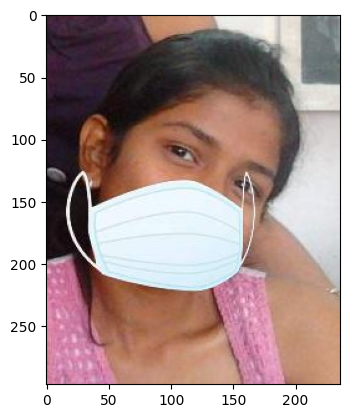

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/project/data/with_mask/with_mask_1657.jpg')
imgplot = plt.imshow(img)
plt.show()

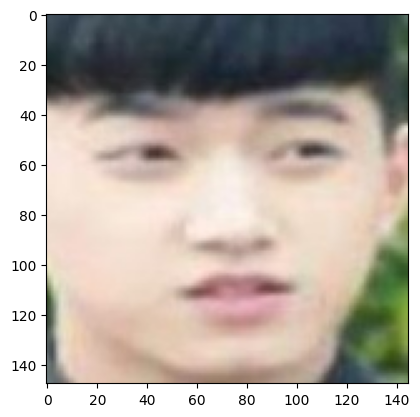

In [ ]:
#displaying image without mask
img = mpimg.imread('/content/drive/MyDrive/project/data/without_mask/without_mask_402.jpg')
imgplot = plt.imshow(img)
plt.show()

**image processing**

1. resize the images
2.convert the images to numpy arrays

In [ ]:
#convertg the image into numpy arrays
#convertg the image into numpy arrays
with_mask_path = '/content/drive/MyDrive/project/data/with_mask'
data = []
for img_file in with_mask_files:
  image = Image.open(os.path.join(with_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)






without_mask_path = '/content/drive/MyDrive/project/data/without_mask'

for img_file in without_mask_files:
  image = Image.open(os.path.join(without_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

In [ ]:
print(data[0])

[[[115 110 106]
  [110 105 100]
  [115 109 106]
  ...
  [165 146 135]
  [166 152 142]
  [168 161 156]]

 [[111 106 101]
  [115 110 105]
  [114 109 105]
  ...
  [172 161 154]
  [165 149 140]
  [162 147 138]]

 [[110 105 101]
  [113 108 104]
  [119 114 109]
  ...
  [166 143 132]
  [163 139 128]
  [163 144 134]]

 ...

 [[175 165 147]
  [120  90  51]
  [117  86  41]
  ...
  [  9   8  13]
  [  9   9   8]
  [  9   9  10]]

 [[138 116  84]
  [114  83  40]
  [118  87  43]
  ...
  [  7   7  11]
  [  9   8   9]
  [ 10  10  12]]

 [[112  80  39]
  [116  85  41]
  [120  89  42]
  ...
  [  6   6   9]
  [  8   8  12]
  [ 10   9  13]]]


In [ ]:
type([0])

list

In [ ]:
data[0].shape

(128, 128, 3)

print("labels" in globals())

In [ ]:
#converting the image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test spilt**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[250, 251, 253],
        [250, 251, 253],
        [250, 251, 253],
        ...,
        [250, 251, 253],
        [250, 251, 253],
        [250, 251, 253]],

       [[250, 251, 253],
        [250, 251, 253],
        [250, 251, 253],
        ...,
        [250, 251, 253],
        [250, 251, 253],
        [250, 251, 253]],

       [[250, 251, 253],
        [250, 251, 253],
        [250, 251, 253],
        ...,
        [250, 251, 253],
        [250, 251, 253],
        [250, 251, 253]],

       ...,

       [[ 60,  67,  83],
        [ 61,  69,  84],
        [ 59,  67,  80],
        ...,
        [175, 185, 194],
        [170, 181, 192],
        [183, 195, 207]],

       [[ 55,  62,  78],
        [ 51,  59,  74],
        [ 52,  60,  73],
        ...,
        [174, 184, 193],
        [169, 180, 191],
        [183, 195, 207]],

       [[ 57,  64,  80],
        [ 57,  64,  79],
        [ 54,  62,  75],
        ...,
        [177, 187, 197],
        [174, 184, 195],
        [185, 197, 209]]], dtype=uint8)
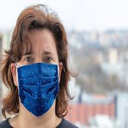

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))#64x64x32

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'))#64x64x64
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))#32x32x64

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 170s 986ms/step - loss: 0.5203 - accuracy: 0.7797 - val_loss: 0.2895 - val_accuracy: 0.8694
Epoch 2/5
170/170 [==============================] - 148s 872ms/step - loss: 0.3007 - accuracy: 0.8804 - val_loss: 0.3298 - val_accuracy: 0.8612
Epoch 3/5
170/170 [==============================] - 148s 874ms/step - loss: 0.2396 - accuracy: 0.9062 - val_loss: 0.3649 - val_accuracy: 0.8661
Epoch 4/5
170/170 [==============================] - 148s 874ms/step - loss: 0.2002 - accuracy: 0.9237 - val_loss: 0.2270 - val_accuracy: 0.9025
Epoch 5/5
170/170 [==============================] - 150s 878ms/step - loss: 0.1744 - accuracy: 0.9336 - val_loss: 0.2468 - val_accuracy: 0.9008


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =',accuracy)

48/48 [==============================] - 10s 217ms/step - loss: 0.2042 - accuracy: 0.9279
Test Accuracy = 0.9278623461723328


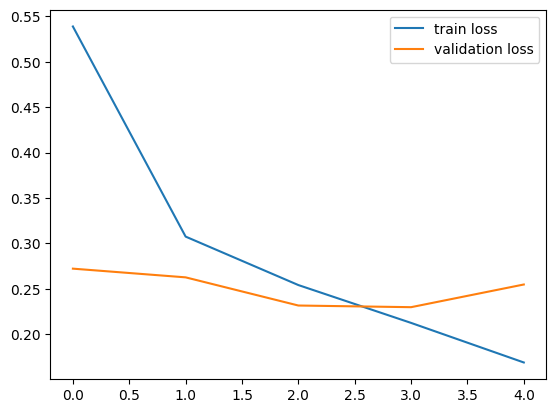

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


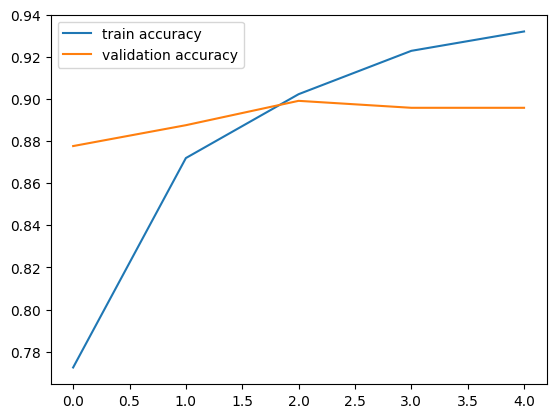

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')

plt.legend()
plt.show()

#plot the accuracy value
print(h.history.keys())
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')

plt.legend()
plt.show()

path of the image to be predicted/content/debunking.jpg


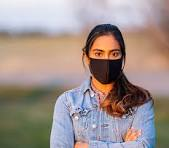

1/1 [==============================] - 0s 113ms/step
[[0.48739293 0.5485619 ]]
1
the person in the image is wearing a mask 


In [ ]:
input_image_path = input('path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255

input_image_reshape = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshape)
print(input_prediction)

input_pred_label = np.argmax(input_prediction )

print(input_pred_label )
if input_pred_label == 1:
    print('the person in the image is wearing a mask ')
else:
    print('the person in the image is not wearing a mask ')

path of the image to be predicted/content/boy.jpg


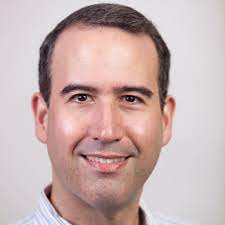

1/1 [==============================] - 0s 24ms/step
[[0.56219697 0.4880521 ]]
0
the person in the image is not wearing a mask 


In [ ]:
input_image_path = input('path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255

input_image_reshape = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshape)
print(input_prediction)

input_pred_label = np.argmax(input_prediction )

print(input_pred_label )
if input_pred_label == 1:
    print('the person in the image is wearing a mask ')
else:
    print('the person in the image is not wearing a mask ')